In [74]:
import pandas as pd                # Pandas     - Tools for creating and working with datasets.
import numpy as np                 # Numpy      - Gives extra maths functionality to help with the creation of plots.
import networkx as nx              # NetworkX   - For creating network graphs of users.
import matplotlib.pyplot as plt    # MatPlotLib - For creating and displaying plots.
import json                        # JSON       - To parse the Entities field in the dataset as they are JSON strings.
from datetime import datetime      # DateTime   - Used to make graphs of data over a certain timeline.
from collections import Counter    # Counter    - For making dictionaries of occurrences from datasets.
from wordcloud import WordCloud    # WordCloud  - For making a word cloud of the most popular hashtags.
import re                          # Regex      - Used for stripping HTML tags from some data.

In [75]:
df = pd.read_csv("../data/Dataset-Cleaned.csv",dtype = {'id_str':object,'from_user_id_str':object,'in_reply_to_screen_name':object,'in_reply_to_status_id_str':object})

In [76]:
num_tweets = len(df)
print(num_tweets)

77267


In [77]:
num_replies = len(df[df.in_reply_to_status_id_str.notnull()])
print("There are %d replies in the dataset." % num_replies)

There are 1185 replies in the dataset.


In [78]:
num_retweets = len(df[df.text.str.contains('RT @')])
print("There are %d retweets in the dataset." % num_retweets)

There are 60278 retweets in the dataset.


In [79]:
num_onlytweets = num_tweets - (num_replies + num_retweets)
print("There are %d tweets in the dataset that aren't replies or retweets."% num_onlytweets)

There are 15804 tweets in the dataset that aren't replies or retweets.


In [80]:
num_users = len(df['from_user'].unique())
print("There are %d users in the dataset." % num_users)

There are 50195 users in the dataset.


In [81]:
avg_tweets = num_tweets / num_users
print("Each user posted an average of %f tweets." % avg_tweets)

Each user posted an average of 1.539337 tweets.


In [82]:
avg_retweets = num_retweets / num_users
print("Each user retweeted an average of %f tweets." % avg_retweets)

Each user retweeted an average of 1.200877 tweets.


In [83]:
avg_replies = num_replies / num_users
print("Each user replied to a tweet an average of %f times." % avg_replies)

Each user replied to a tweet an average of 0.023608 times.


The structure of the dataset (tweets/retweets/replies):

In [84]:
labels = 'Retweets', 'Replies', 'Tweets'

In [85]:
sizes = [num_retweets, num_replies, num_onlytweets]

In [86]:
explode = (0,0,0)

In [87]:
fig1, ax1 = plt.subplots()

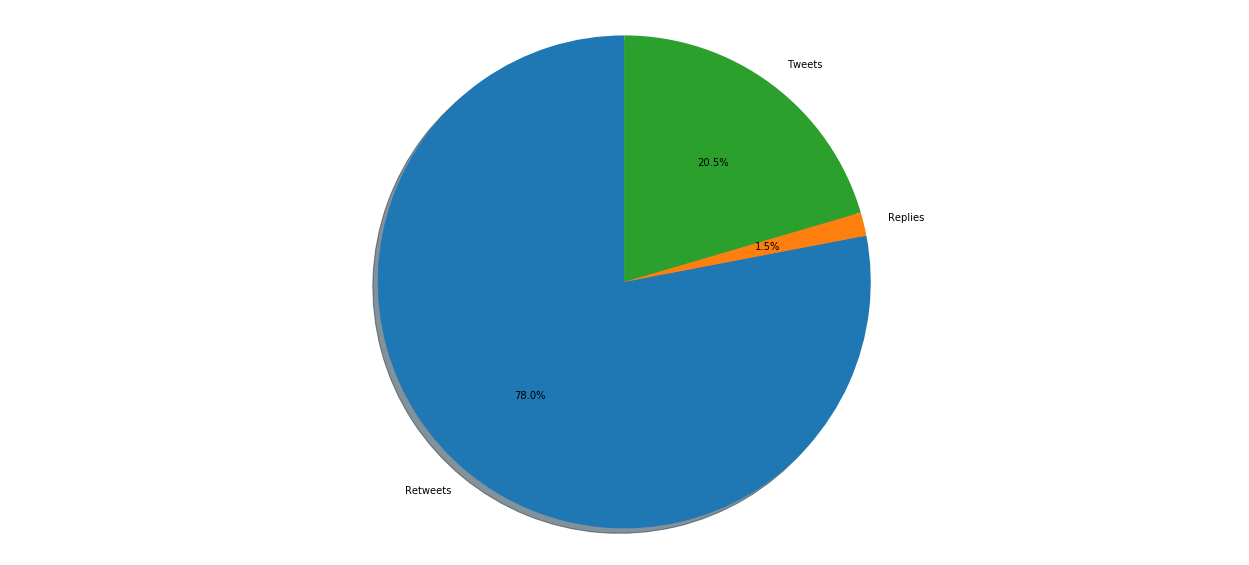

In [88]:
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

This graph displays the breakdown between retweets, replies and standalone tweets. Retweets hold the highest percentage as would be expected from people retweeting from news sources and organisations involved in the launch.

In [89]:
entities_list = df['entities_str']

In [90]:
NewObject = json.loads(df.iloc[0].entities_str)

In [91]:
NewObject['hashtags']

[{'indices': [44, 54], 'text': 'GUERRIERO'},
 {'indices': [57, 69], 'text': 'portaaporta'},
 {'indices': [72, 85], 'text': 'CometLanding'},
 {'indices': [88, 100], 'text': 'TorSapienza'},
 {'indices': [103, 111], 'text': 'Rosetta'}]

Identifying the most popular hashtags:

In [92]:
EntityArray = []
for x in range(0,len(df)):
    if isinstance(df.iloc[x].entities_str, str):
        EntityArray.append(json.loads(df.iloc[x].entities_str))

In [93]:
EntityArray[0]['hashtags'][0]['text']

'GUERRIERO'

In [94]:
HashTags = {}

In [95]:
counter = 0
for i in range(0,len(EntityArray)):
    counter = counter +1
    for j in range(0,len(EntityArray[i]['hashtags'])):
        currentHashtag = str(EntityArray[i]['hashtags'][j]['text'])
        if currentHashtag in HashTags:
            HashTags[currentHashtag] = HashTags.get(currentHashtag) + 1
        else:
            HashTags[currentHashtag] = 1
counter

77266

In [96]:
HashTags

{'GUERRIERO': 152,
 'portaaporta': 85,
 'CometLanding': 62752,
 'TorSapienza': 74,
 'Rosetta': 5912,
 'cometlanding': 13211,
 'jp86': 1,
 'SEP': 623,
 'probe': 4,
 'comet': 355,
 'Cometlanding': 1036,
 'Philae': 3097,
 'momentistorici': 6,
 'yay': 4,
 'microaggressions': 1,
 '67P': 7922,
 'makinghistory': 3,
 'confirmation': 48,
 'esa': 680,
 'BNEGlobalCafe': 7,
 'Ø§Ø²Ø¹Ù„Ùƒ_ÙˆØ§Ø±Ø¶ÙŠÙƒ': 11,
 '7HoursOfTerror': 8,
 'ESOC': 63,
 'philae2014': 9,
 'rosetta': 702,
 'selfie': 89,
 'philae': 600,
 'Komet': 28,
 'Telespazio': 2,
 'DLR': 27,
 '7HoursofTerror': 3,
 'indiedev': 8,
 'CometTrek': 7,
 'cometLanding': 84,
 'semanasciencia': 2,
 'RejectedMuppets': 218,
 'Supernatural200thEpisode': 94,
 'MixersAreReadyForAlbum3': 3,
 'AnarchyAfterword': 2,
 'RosettaMission': 54,
 'rosettamission': 431,
 '7hoursofterror': 2,
 'Philae2014': 259,
 'space': 452,
 'scicomm': 8,
 'havesaveland': 1,
 'fragdieesa': 5,
 'HomeToMama': 208,
 'HariAyah': 22,
 'FleetwoodMac': 1,
 'SucceededSoSuccessfully': 1,
 '

In [97]:
tagList = sorted(HashTags.items(), key=lambda x:x[1])

In [98]:
tagList[::-1]

[('CometLanding', 62752),
 ('cometlanding', 13211),
 ('67P', 7922),
 ('Rosetta', 5912),
 ('Philae', 3097),
 ('Cometlanding', 1036),
 ('WishKoSaPasko', 988),
 ('HappyBirthdaySandaraPark', 965),
 ('rosetta', 702),
 ('esa', 680),
 ('SEP', 623),
 ('philae', 600),
 ('PoseToiPhilae', 569),
 ('space', 452),
 ('ESA', 445),
 ('rosettamission', 431),
 ('comet', 355),
 ('Philae2014', 259),
 ('COMETLANDING', 252),
 ('ISS', 231),
 ('AOS', 224),
 ('RejectedMuppets', 218),
 ('HomeToMama', 208),
 ('science', 194),
 ('ESA_Rosetta', 188),
 ('xkcd', 162),
 ('BreakTheInternet', 158),
 ('GUERRIERO', 152),
 ('TimoGH15', 148),
 ('DoctorWho', 146),
 ('Agilkia', 144),
 ('spaceveg', 138),
 ('Interstellar', 126),
 ('CometWatch', 122),
 ('autoinculpacions9N', 120),
 ('trndnl', 118),
 ('jets', 98),
 ('5SOSLONGWAYHOME', 94),
 ('Supernatural200thEpisode', 94),
 ('selfie', 89),
 ('Rosseta', 85),
 ('portaaporta', 85),
 ('cometLanding', 84),
 ('Comet67P', 83),
 ('WeCanLandOnACometButWeCant', 82),
 ('touchdown', 82),
 (

This dictionary represents hashtags and their occurences in the dataset. As would be expected, the first couple are variations on cometlanding but the useful information comes from slightly lower down. The most common hashtags are those relating to the mission itself. 

In [99]:
print("There are %d unique hashtags in the dataset." % len(tagList))

There are 3120 unique hashtags in the dataset.


In [100]:
Nov12Tweets = df['time']

In [101]:
timeArray = []
for x in range(0,len(Nov12Tweets)):
    if isinstance(Nov12Tweets[x], str):
        timeArray.append(datetime.strptime(Nov12Tweets[x],'%d/%m/%Y %H:%M').replace(minute=0))

In [102]:
timeArray

[datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),
 datetime.datetime(2014, 11, 12, 9, 0),


In [103]:
timeDictionary = Counter(timeArray)
timeDictionary

Counter({datetime.datetime(2014, 11, 12, 9, 0): 9816,
         datetime.datetime(2014, 11, 12, 10, 0): 5239,
         datetime.datetime(2014, 11, 12, 11, 0): 5827,
         datetime.datetime(2014, 11, 12, 12, 0): 6361,
         datetime.datetime(2014, 11, 12, 13, 0): 5159,
         datetime.datetime(2014, 11, 12, 14, 0): 2103,
         datetime.datetime(2014, 11, 12, 15, 0): 5712,
         datetime.datetime(2014, 11, 12, 16, 0): 5895,
         datetime.datetime(2014, 11, 12, 17, 0): 5904,
         datetime.datetime(2014, 11, 12, 18, 0): 5899,
         datetime.datetime(2014, 11, 12, 19, 0): 3529,
         datetime.datetime(2014, 11, 12, 20, 0): 3776,
         datetime.datetime(2014, 11, 12, 21, 0): 2116,
         datetime.datetime(2014, 11, 12, 22, 0): 4507,
         datetime.datetime(2014, 11, 12, 23, 0): 1369,
         datetime.datetime(2014, 11, 26, 14, 0): 70,
         datetime.datetime(2014, 11, 26, 15, 0): 61,
         datetime.datetime(2014, 11, 26, 16, 0): 80,
         datetime

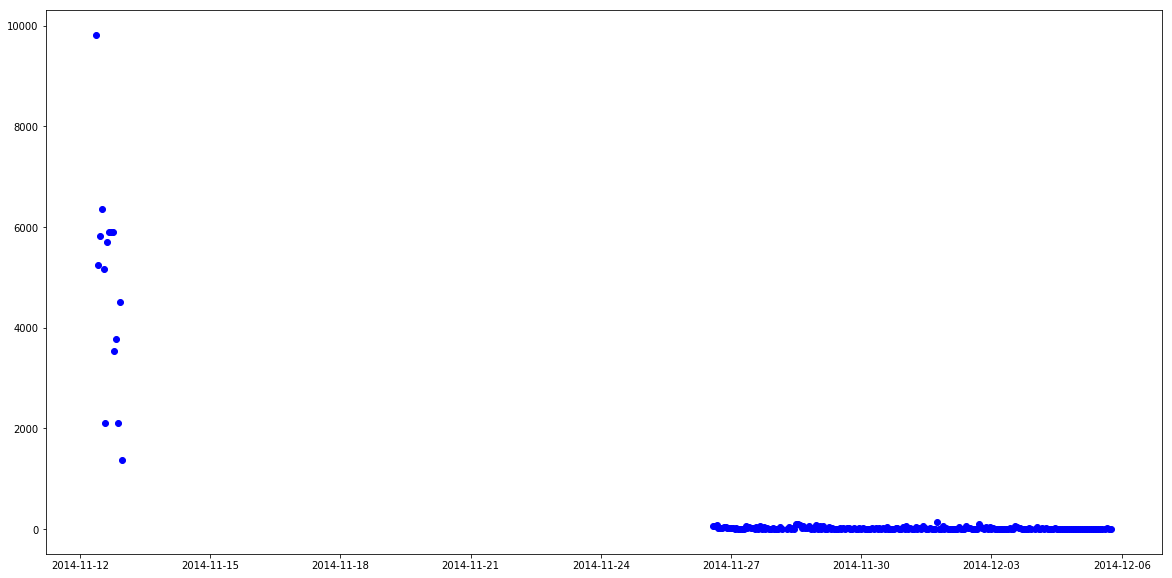

In [104]:
dates = list(timeDictionary.keys())
count = list(timeDictionary.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.plot_date(dates,count, 'bo')
plt.show()

The graph above represents the number of tweets by hour over the whole time covered by the dataset. As expected, the highest number of tweets come from the day of the landing. The other iteresting thing to note is the lack of data from the 12th to 27th November. This could be because there were no tweets during this time but the more likely reason is a gap in the data. 

In [105]:
firstDayDict = {}
for x in timeDictionary:
    if x.month == 11 and x.day == 12:
        firstDayDict[x] = timeDictionary[x]
    else:
        break
firstDayDict

{datetime.datetime(2014, 11, 12, 9, 0): 9816,
 datetime.datetime(2014, 11, 12, 10, 0): 5239,
 datetime.datetime(2014, 11, 12, 11, 0): 5827,
 datetime.datetime(2014, 11, 12, 12, 0): 6361,
 datetime.datetime(2014, 11, 12, 13, 0): 5159,
 datetime.datetime(2014, 11, 12, 14, 0): 2103,
 datetime.datetime(2014, 11, 12, 15, 0): 5712,
 datetime.datetime(2014, 11, 12, 16, 0): 5895,
 datetime.datetime(2014, 11, 12, 17, 0): 5904,
 datetime.datetime(2014, 11, 12, 18, 0): 5899,
 datetime.datetime(2014, 11, 12, 19, 0): 3529,
 datetime.datetime(2014, 11, 12, 20, 0): 3776,
 datetime.datetime(2014, 11, 12, 21, 0): 2116,
 datetime.datetime(2014, 11, 12, 22, 0): 4507,
 datetime.datetime(2014, 11, 12, 23, 0): 1369}

Following is a graph of the frequency of tweets across the first day.

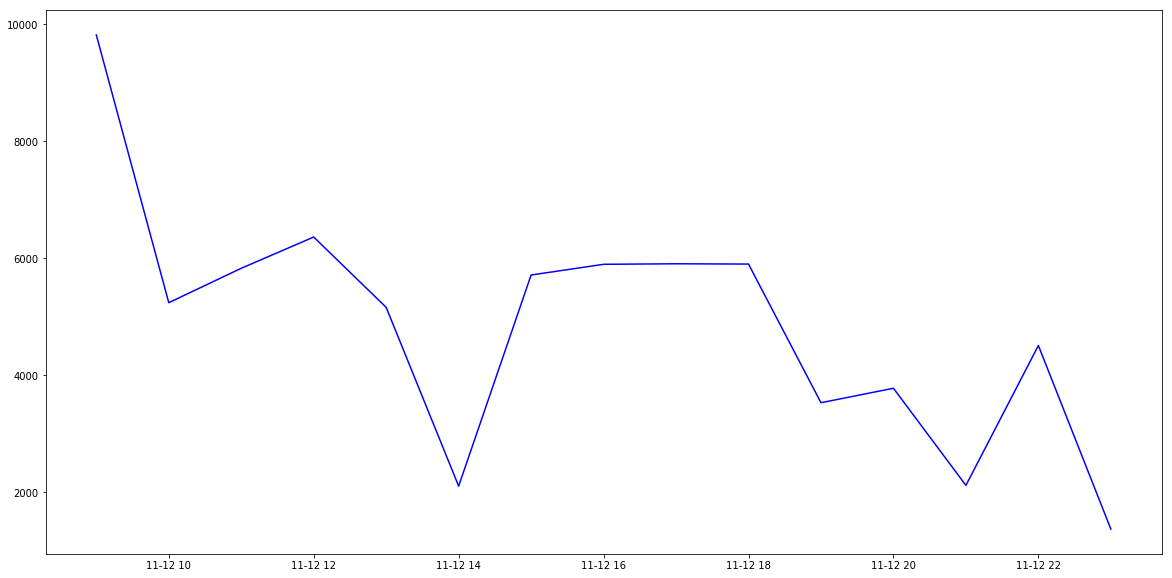

In [106]:
dates = list(firstDayDict.keys())
count = list(firstDayDict.values())
plt.rcParams["figure.figsize"] = (20,10)
plt.plot_date(dates,count, 'b-')
#plt.plot().scatter(dates,count, 'bo')
plt.show()

The graph shows a stark decline from the begining which would be 09:00 GMT. The most likely reason for this is that this would be the early hours of the morning for those in North America, who are the largest demographic who are likely to be tweeting about the landing. Later there is a spike in tweets around 16:00 GMT. This is around the same time the Philae craft landed on the comet which would explain the sudden rise in activity.

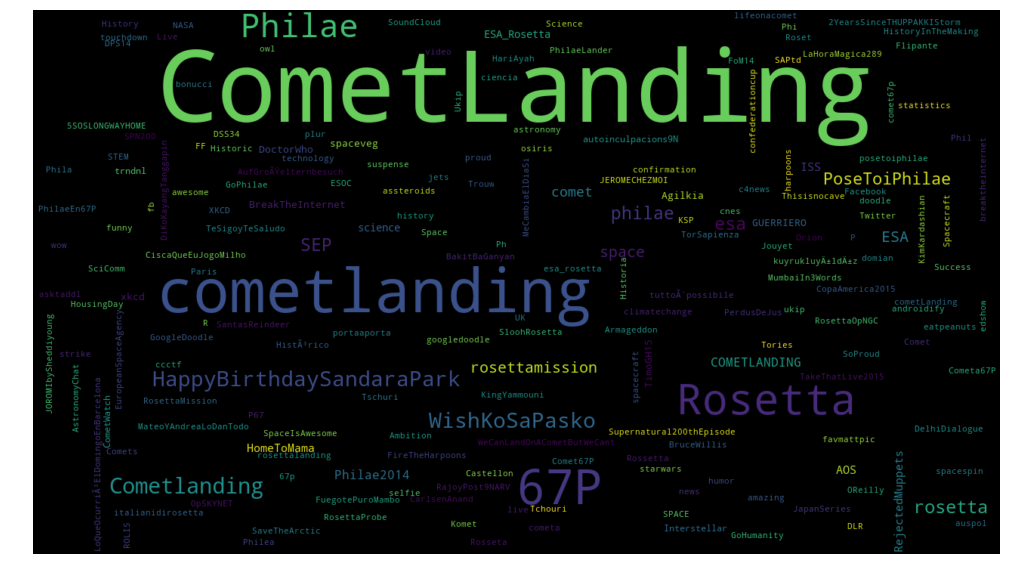

In [107]:
wordcloud = WordCloud(width=1280,height=720)
wordcloud.generate_from_frequencies(HashTags)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

The above word cloud shows the hashtags and how often they are used. This version is overpowered by variations of "cometlanding" and isn't as useful as it could be.

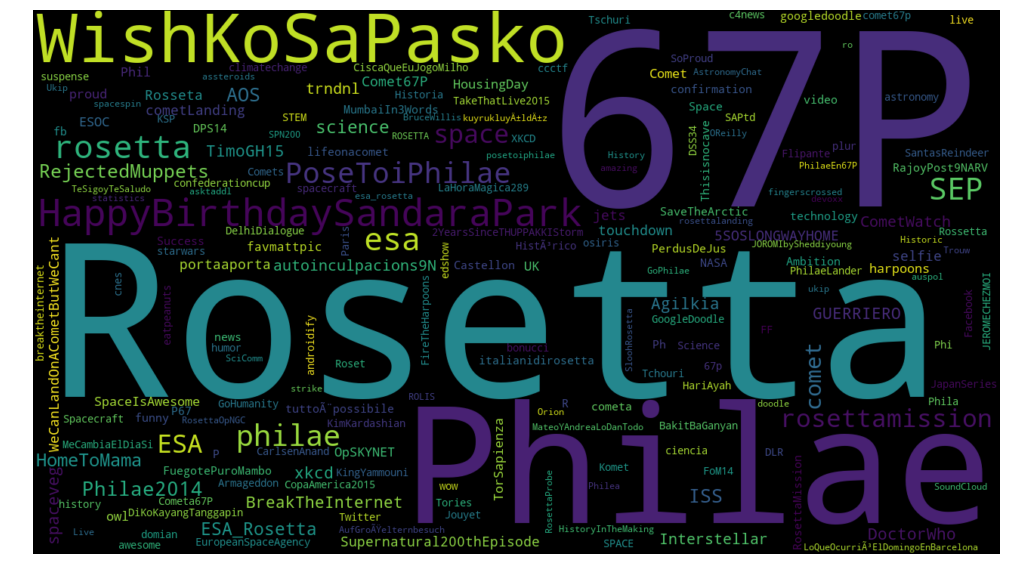

In [108]:
hashTagsCopy = HashTags.copy()
hashTagsCopy.pop("CometLanding",None)
hashTagsCopy.pop("cometlanding",None)
hashTagsCopy.pop("Cometlanding",None)
hashTagsCopy.pop("COMETLANDING",None)

wordcloud = WordCloud(width=1280,height=720)
wordcloud.generate_from_frequencies(hashTagsCopy)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

This new version of the word cloud does not include the more common variations of "cometlanding". This provides far more useful information and shows that the most common hashtags are ones that are related to the landing such as "67P" which was the designation of the comet and the names of the two craft involved in the mission. 

Additional requirements: Analyse applications used to send tweets

In [109]:
appNames = []
source = df['source']
for s in source:
    if isinstance(s, str):
        appNames.append(re.sub("<[^<]+?>","",s).replace("/  +/g"," "))
appNames

['Twitter for Android',
 'Twitter for iPhone',
 'Twitter Web Client',
 'Twitter for Android Tablets',
 'TweetCaster for Android',
 'Twitter for Mac',
 'Twitter for Android Tablets',
 'Twitter Web Client',
 'Twitter for Android',
 'twitterfeed',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter Web Client',
 'Twitter for iPad',
 'twitterfeed',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter Web Client',
 'Twitter Web Client',
 'Livestream Android app',
 'Twitter Web Client',
 'Twitter Web Client',
 'TweetDeck',
 'Janetter',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter Web Client',
 'Dabr.eu - latest @Dabr build',
 'Twitter Web Client',
 'Twitter for iPhone',
 'Twitter Web Client',
 'twitterfeed',
 'Twitter Web Client',
 'TweetDeck',
 'Twitter Web Client',
 'Twitter Web Client',
 'Twitter for Android',
 'twitterfeed',
 'Twitter for Android',
 'Tweet

In [110]:
appcounter = sorted(Counter(appNames).items(),key=lambda x:x[1])
appcounter = appcounter[::-1]

In [111]:
top_10_apps = []
for x in range(0,10):
    top_10_apps.append(appcounter[x])
top_10_apps

[('Twitter Web Client', 27925),
 ('Twitter for iPhone', 13743),
 ('Twitter for Android', 12770),
 ('TweetDeck', 4075),
 ('Twitter for iPad', 3282),
 ('dlvr.it', 1671),
 ('Twitter for Websites', 1462),
 ('Tweetbot for iÎŸS', 1055),
 ('Twitter for Windows Phone', 932),
 ('Tweet Old Post', 925)]

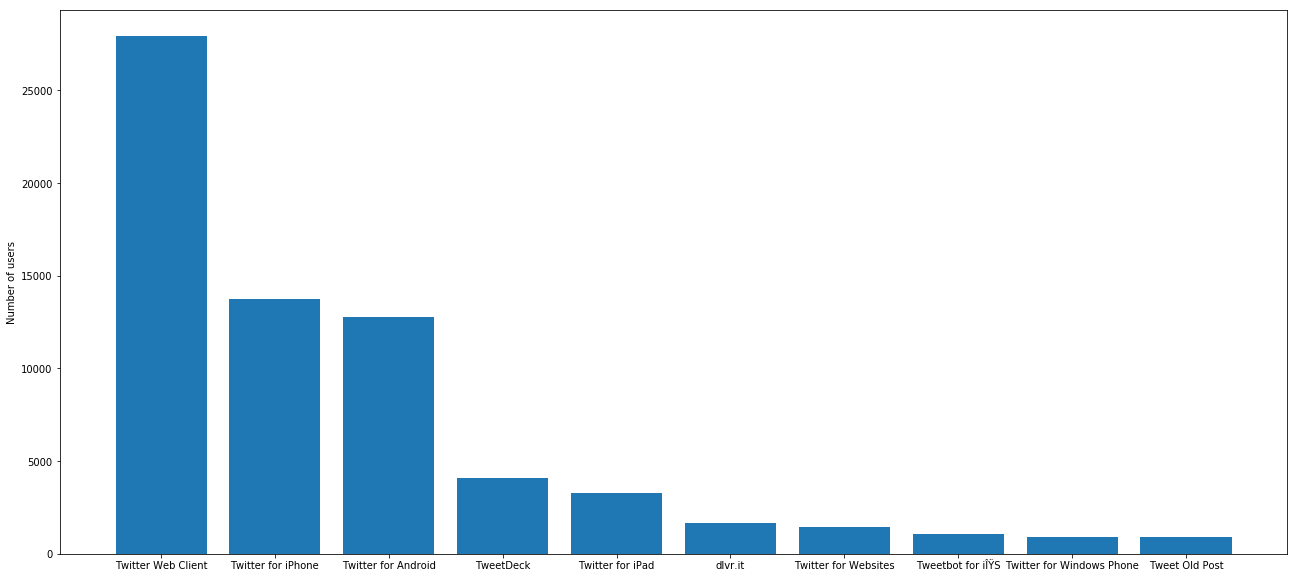

In [112]:
apps = []
numbers = []
for x in top_10_apps:
    apps.append(x[0])
    numbers.append(x[1])

plt.rcParams["figure.figsize"] = (22,10)
x_pos = np.arange(len(apps))
plt.bar(x_pos,numbers,align="center")
plt.xticks(x_pos,apps)
plt.ylabel("Number of users")
plt.show()

The graph above represents the 10 most common applications used to send tweets. The first 3 are rather obvious, being the web client and mobile twitter apps. The 4th highest is where it becomes more interesting. The 4th most used application is TweetDeck which is an application used for managing twitter accounts. This tool is currently owned by twitter themselves. The 6th item on the list is an app called dlvr.it. It is an that provides automated mangement for twitter accounts. The remaining elements in the graph are very similar to the ones already mentioned.

In [113]:
users_replied_to = len(df['in_reply_to_user_id_str'].unique()) - 1
users_replied_to

799

In [114]:
users_replied_percent = (users_replied_to / num_users) * 100
print("%f%% of the users were replied to in the dataset." % users_replied_percent)

1.591792% of the users were replied to in the dataset.


In [115]:
users_avg_retweets = (num_retweets / num_users)
print("The average user was retweeted %f times" % users_avg_retweets)

The average user was retweeted 1.200877 times


In [116]:
newDF = df[df.in_reply_to_screen_name.notnull()]

In [117]:
replyList = []
for x in range(0, len(newDF)):
    #if (str(newDF.iloc[x].in_reply_to_screen_name).notnull()):
    replyList.append((newDF.iloc[x].from_user, newDF.iloc[x].in_reply_to_screen_name))
        

In [118]:
replyList

[('Del_Alpha', 'BBCBreaking'),
 ('cocoy', 'verge'),
 ('drfarres', 'ESA_Rosetta'),
 ('arrayson', 'charlieowen4'),
 ('whereisyvette', 'purplefroglet'),
 ('NagyNellbrack', 'investiganonimo'),
 ('_adeliadeli', 'Jackyflatter'),
 ('sUASnews', 'RAeSTimR'),
 ('ArnaudDevelay', 'Philae2014'),
 ('CelestiniaSpace', 'ESA_Rosetta'),
 ('MileHighFlyGuy', 'Philae2014'),
 ('Paleo_Bonegirl', 'ESA_Rosetta'),
 ('sajeffe', 'Philae2014'),
 ('Haringey6thForm', 'JumpMag'),
 ('mashedbannana', 'HCross2012'),
 ('_Nosila_', 'AstroKatie'),
 ('eric_lobdell', 'KerbalSpaceP'),
 ('marginal_error', 'AstroGingerSnap'),
 ('ludvik264', 'ESA_Rosetta'),
 ('adamcorrie', 'danielscuka'),
 ('Carlhopkins', 'Carlhopkins'),
 ('ogeerunner', 'megschwamb'),
 ('Rubee100', 'DiyaMarketing'),
 ('Brendano', 'astrojenny'),
 ('dominiqueleglu', 'ESA_Rosetta'),
 ('jasperdebock', 'Philae2014'),
 ('craigiw', 'esa'),
 ('LaraLlama1', 'emilysmart17'),
 ('bluenumeral', 'DeDee_06'),
 ('ESA_fr', 'esa'),
 ('denebofficial', 'Philae2014'),
 ('gernot_t', 

In [119]:
filteredReplyList = []
for x in range (0,len(replyList)):
    filteredReplyList.append(replyList[x][1])

In [120]:
filteredReplyList

['BBCBreaking',
 'verge',
 'ESA_Rosetta',
 'charlieowen4',
 'purplefroglet',
 'investiganonimo',
 'Jackyflatter',
 'RAeSTimR',
 'Philae2014',
 'ESA_Rosetta',
 'Philae2014',
 'ESA_Rosetta',
 'Philae2014',
 'JumpMag',
 'HCross2012',
 'AstroKatie',
 'KerbalSpaceP',
 'AstroGingerSnap',
 'ESA_Rosetta',
 'danielscuka',
 'Carlhopkins',
 'megschwamb',
 'DiyaMarketing',
 'astrojenny',
 'ESA_Rosetta',
 'Philae2014',
 'esa',
 'emilysmart17',
 'DeDee_06',
 'esa',
 'Philae2014',
 'Der_Postillon',
 'esaoperations',
 'esa',
 'ESA_Rosetta',
 'ESA_Rosetta',
 'ESA_Rosetta',
 'esa',
 'esa',
 'Philae2014',
 'willsmith',
 'ESA_Rosetta',
 'ESA_Rosetta',
 'esa',
 'FacultiMedia',
 'ESA_de',
 'ESA_Rosetta',
 'Philae2014',
 'esaoperations',
 'govertschilling',
 'ESA_Rosetta',
 'ESA_Rosetta',
 'GuusRoeselers',
 'icey_mark',
 'esaoperations',
 'GappistanRadio',
 'kennethmosop',
 'ESA_Rosetta',
 'ESA_Rosetta',
 'hoyenmadrid',
 'elakdawalla',
 'G_Salanitro',
 'BBCBreaking',
 'Philae2014',
 'Philae2014',
 'Philae201

In [121]:
G = nx.Graph()

In [122]:
G.add_edges_from(replyList)

In [123]:
plt.subplot(121)

In [124]:
nx.draw(G)
plt.subplot(122)

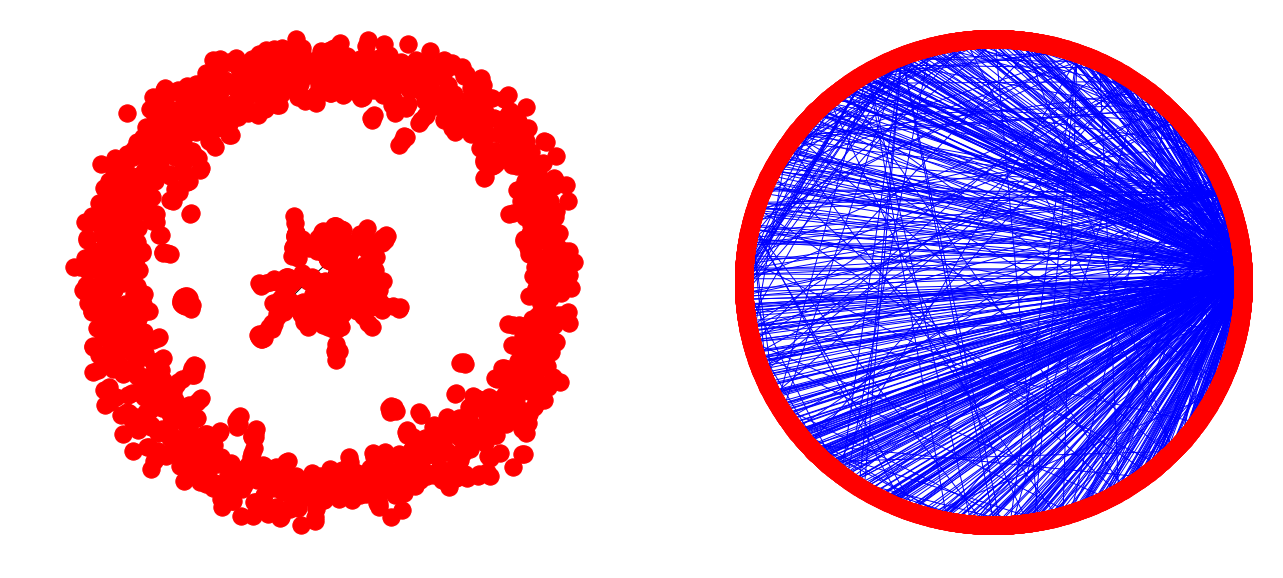

In [125]:
nx.draw(G, pos=nx.circular_layout(G), nodecolor='r', edge_color='b')
plt.show()

The network graphs above represent the connections between replies in the dataset. With the large size of the data set it is difficult to pull any useful information from these graphs.

In [126]:
mostRepliedto = sorted(Counter(filteredReplyList).items(),key=lambda x:x[1])
mostRepliedto = mostRepliedto[::-1]
mostRepliedto

[('Philae2014', 333),
 ('ESA_Rosetta', 205),
 ('esa', 74),
 ('NASA', 32),
 ('BBCBreaking', 31),
 ('esaoperations', 30),
 ('mashable', 14),
 ('teobesta', 13),
 ('elakdawalla', 11),
 ('edshow', 9),
 ('esascience', 9),
 ('ObservingSpace', 8),
 ('Philae_MUPUS', 8),
 ('newscientist', 6),
 ('nationaltrust', 6),
 ('nchazarra', 6),
 ('Wellard_Rumble', 5),
 ('neiltyson', 4),
 ('SpaceflightNow', 4),
 ('mggtTaylor', 4),
 ('CNES', 4),
 ('esa_es', 4),
 ('BBC_HaveYourSay', 4),
 ('SungrazerComets', 4),
 ('timmermansr', 4),
 ('govertschilling', 4),
 ('AstroKatie', 4),
 ('WoahThereJen', 3),
 ('ItsTheDoctor', 3),
 ('Warruz', 3),
 ('Neil16B', 3),
 ('dcas1978', 3),
 ('JPMajor', 3),
 ('JohnRMoffitt', 3),
 ('mars_stu', 3),
 ('NewHorizons2015', 3),
 ('twitter', 3),
 ('chrislintott', 3),
 ('britishmuseum', 3),
 ('xkcdComic', 3),
 ('maxplanckpress', 3),
 ('AlicesAstroInfo', 3),
 ('Philae_Ptolemy', 3),
 ('DLR_next', 3),
 ('cnnbrk', 3),
 ('ARTEfuture', 3),
 ('Markotron', 3),
 ('CNNLightYears', 3),
 ('el_pais', 3

In [127]:
tempDF = newDF[newDF.in_reply_to_screen_name == 'Philae2014']
tempDF

,Unnamed: 0,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
544,76774,532460428585361000,ArnaudDevelay,@Philae2014 vient de se sÃ©parer de @ESA_Roset...,Wed Nov 12 09:10:33 +0000 2014,12/11/2014 09:10,NaN,fr,208442526.0,Philae2014,2425322425,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/4517274951...,8.0,38.0,http://twitter.com/ArnaudDevelay/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
607,76711,532460459610230000,MileHighFlyGuy,@Philae2014 Safe journey. #CometLanding @ESA_R...,Wed Nov 12 09:10:40 +0000 2014,12/11/2014 09:10,NaN,en,208442526.0,Philae2014,21692013,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5305962185...,364.0,802.0,http://twitter.com/MileHighFlyGuy/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
729,76589,532460528564592000,sajeffe,@Philae2014 Gogogo! Good luck! #CometLanding,Wed Nov 12 09:10:57 +0000 2014,12/11/2014 09:10,NaN,en,208442526.0,Philae2014,28627950,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3788000000...,332.0,91.0,http://twitter.com/sajeffe/statuses/5324605285...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1103,76215,532460753400631000,jasperdebock,@Philae2014 And now.... we wait.... \n\n#Comet...,Wed Nov 12 09:11:50 +0000 2014,12/11/2014 09:11,NaN,en,208442526.0,Philae2014,107686824,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/1192847698...,19.0,75.0,http://twitter.com/jasperdebock/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1307,76011,532460863056523000,denebofficial,@Philae2014 we're all with you!! #CometLanding,Wed Nov 12 09:12:17 +0000 2014,12/11/2014 09:12,NaN,it,208442526.0,Philae2014,250780699,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1633342509...,986.0,1814.0,http://twitter.com/denebofficial/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1453,75865,532460938323316000,NatGeoTvItalia,@Philae2014 now you are alone. Good luck! #Com...,Wed Nov 12 09:12:35 +0000 2014,12/11/2014 09:12,NaN,it,208442526.0,Philae2014,110450798,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",http://pbs.twimg.com/profile_images/3788000006...,7936.0,161.0,http://twitter.com/NatGeoTvItalia/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1524,75794,532460971164307000,angkasamalaysia,@Philae2014 Happy Birthday &amp; safe journey!...,Wed Nov 12 09:12:42 +0000 2014,12/11/2014 09:12,NaN,en,208442526.0,Philae2014,155773798,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/991794605/...,352.0,57.0,http://twitter.com/angkasamalaysia/statuses/53...,"{""hashtags"":[{""text"":""Malaysia"",""indices"":[73,..."
2198,75120,532461374635794000,kmdk,Happy landing! #exciting #thrilling RT @Philae...,Wed Nov 12 09:14:19 +0000 2014,12/11/2014 09:14,NaN,en,208442526.0,Philae2014,17350073,532451193537445000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000008...,1946.0,924.0,http://twitter.com/kmdk/statuses/5324613746357...,"{""hashtags"":[{""text"":""exciting"",""indices"":[15,..."
2221,75097,532461389571710000,SalopianJacob,@Philae2014 has successfully departed down to ...,Wed Nov 12 09:14:22 +0000 2014,12/11/2014 09:14,NaN,en,208442526.0,Philae2014,292369622,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/5279722115...,156.0,141.0,http://twitter.com/SalopianJacob/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2244,75074,532461409121370000,betlagal,

In [128]:
tempDF2 = newDF[newDF.in_reply_to_screen_name == 'ESA_Rosetta']
tempDF2

,Unnamed: 0,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
56,77262,532460171843629000,drfarres,@ESA_Rosetta congratulatins for the separation...,Wed Nov 12 09:09:32 +0000 2014,12/11/2014 09:09,NaN,ca,253536357.0,ESA_Rosetta,190801607,532459086462615000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/2312825800...,159.0,352.0,http://twitter.com/drfarres/statuses/532460171...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
588,76730,532460450848706000,CelestiniaSpace,"@ESA_Rosetta @Philae2014 @esa Congratulations,...",Wed Nov 12 09:10:38 +0000 2014,12/11/2014 09:10,NaN,en,253536357.0,ESA_Rosetta,2277987787,532459086462615000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5318475031...,69.0,685.0,http://twitter.com/CelestiniaSpace/statuses/53...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
723,76595,532460527034060000,Paleo_Bonegirl,@ESA_Rosetta Separation confirmed for @Philae2...,Wed Nov 12 09:10:56 +0000 2014,12/11/2014 09:10,"loc: -26.10519157,27.9072171",en,253536357.0,ESA_Rosetta,14746356,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4645710244...,1399.0,1999.0,http://twitter.com/Paleo_Bonegirl/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
887,76431,532460623469498000,ludvik264,@ESA_Rosetta @Philae2014 Congratulations!! I w...,Wed Nov 12 09:11:19 +0000 2014,12/11/2014 09:11,NaN,es,253536357.0,ESA_Rosetta,2166949068,532459086462615000,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4689012686...,81.0,104.0,http://twitter.com/ludvik264/statuses/53246062...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1073,76245,532460736833155000,dominiqueleglu,"@ESA_Rosetta c'est comme la ""naissance"" de Phi...",Wed Nov 12 09:11:46 +0000 2014,12/11/2014 09:11,NaN,fr,253536357.0,ESA_Rosetta,442847310,532369195380797000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1706172066...,1172.0,586.0,http://twitter.com/dominiqueleglu/statuses/532...,"{""hashtags"":[{""text"":""PoseToiPhilae"",""indices""..."
1362,75956,532460891879776000,BeeM001,@ESA_Rosetta @Philae2014 Good luck!!!!! #Comet...,Wed Nov 12 09:12:23 +0000 2014,12/11/2014 09:12,NaN,en,253536357.0,ESA_Rosetta,69840475,532459086462615000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3788000004...,13.0,49.0,http://twitter.com/BeeM001/statuses/5324608918...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1386,75932,532460904127143000,johnniemojo,@ESA_Rosetta @Philae2014 GREAT separation ever...,Wed Nov 12 09:12:26 +0000 2014,12/11/2014 09:12,NaN,en,253536357.0,ESA_Rosetta,152771483,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/1586968807...,1017.0,949.0,http://twitter.com/johnniemojo/statuses/532460...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1429,75889,532460924465344000,Step_981,"@ESA_Rosetta good luck @Philae2014, have a saf...",Wed Nov 12 09:12:31 +0000 2014,12/11/2014 09:12,NaN,it,253536357.0,ESA_Rosetta,162332146,532459086462615000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4382844323...,1092.0,1545.0,http://twitter.com/Step_981/statuses/532460924...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1459,75859,532460942702153000,JulioMiravalls,@ESA_Rosetta Esta pinta tiene el mÃ³dulo @Phil...,Wed Nov 12 09:12:36 +0000 2014,12/11/2014 09:12,NaN,es,253536357.0,ESA_Rosetta,378024218,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1555022303...,852.0,375.0,http://twitter.com/JulioMi

In [129]:
newDF = tempDF.append(tempDF2)

In [130]:
newDF

,Unnamed: 0,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
544,76774,532460428585361000,ArnaudDevelay,@Philae2014 vient de se sÃ©parer de @ESA_Roset...,Wed Nov 12 09:10:33 +0000 2014,12/11/2014 09:10,NaN,fr,208442526.0,Philae2014,2425322425,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/4517274951...,8.0,38.0,http://twitter.com/ArnaudDevelay/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
607,76711,532460459610230000,MileHighFlyGuy,@Philae2014 Safe journey. #CometLanding @ESA_R...,Wed Nov 12 09:10:40 +0000 2014,12/11/2014 09:10,NaN,en,208442526.0,Philae2014,21692013,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5305962185...,364.0,802.0,http://twitter.com/MileHighFlyGuy/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
729,76589,532460528564592000,sajeffe,@Philae2014 Gogogo! Good luck! #CometLanding,Wed Nov 12 09:10:57 +0000 2014,12/11/2014 09:10,NaN,en,208442526.0,Philae2014,28627950,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3788000000...,332.0,91.0,http://twitter.com/sajeffe/statuses/5324605285...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1103,76215,532460753400631000,jasperdebock,@Philae2014 And now.... we wait.... \n\n#Comet...,Wed Nov 12 09:11:50 +0000 2014,12/11/2014 09:11,NaN,en,208442526.0,Philae2014,107686824,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/1192847698...,19.0,75.0,http://twitter.com/jasperdebock/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1307,76011,532460863056523000,denebofficial,@Philae2014 we're all with you!! #CometLanding,Wed Nov 12 09:12:17 +0000 2014,12/11/2014 09:12,NaN,it,208442526.0,Philae2014,250780699,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1633342509...,986.0,1814.0,http://twitter.com/denebofficial/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1453,75865,532460938323316000,NatGeoTvItalia,@Philae2014 now you are alone. Good luck! #Com...,Wed Nov 12 09:12:35 +0000 2014,12/11/2014 09:12,NaN,it,208442526.0,Philae2014,110450798,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",http://pbs.twimg.com/profile_images/3788000006...,7936.0,161.0,http://twitter.com/NatGeoTvItalia/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1524,75794,532460971164307000,angkasamalaysia,@Philae2014 Happy Birthday &amp; safe journey!...,Wed Nov 12 09:12:42 +0000 2014,12/11/2014 09:12,NaN,en,208442526.0,Philae2014,155773798,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/991794605/...,352.0,57.0,http://twitter.com/angkasamalaysia/statuses/53...,"{""hashtags"":[{""text"":""Malaysia"",""indices"":[73,..."
2198,75120,532461374635794000,kmdk,Happy landing! #exciting #thrilling RT @Philae...,Wed Nov 12 09:14:19 +0000 2014,12/11/2014 09:14,NaN,en,208442526.0,Philae2014,17350073,532451193537445000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000008...,1946.0,924.0,http://twitter.com/kmdk/statuses/5324613746357...,"{""hashtags"":[{""text"":""exciting"",""indices"":[15,..."
2221,75097,532461389571710000,SalopianJacob,@Philae2014 has successfully departed down to ...,Wed Nov 12 09:14:22 +0000 2014,12/11/2014 09:14,NaN,en,208442526.0,Philae2014,292369622,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/5279722115...,156.0,141.0,http://twitter.com/SalopianJacob/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2244,75074,532461409121370000,betlagal,

In [131]:
replyList = []
for x in range(0, len(newDF)):
    replyList.append((newDF.iloc[x].from_user, newDF.iloc[x].in_reply_to_screen_name))

In [132]:
G = nx.Graph()

In [133]:
G.add_edges_from(replyList)

In [134]:
nx.draw(G)

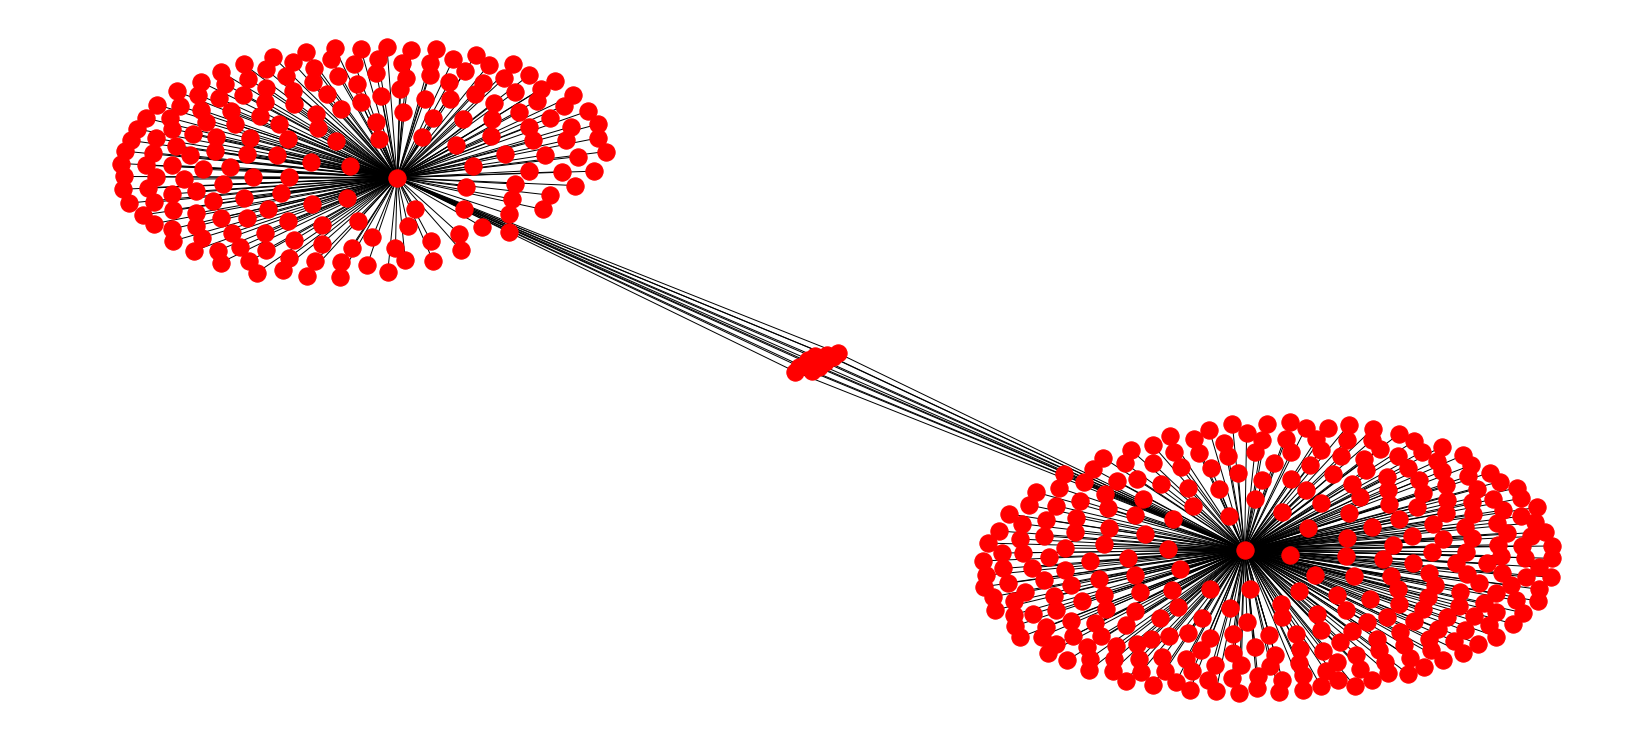

In [135]:
plt.show()

This graph represents replies to the two most replied to twitter accounts. These two are @Philae2014 and @ESA_Rosetta, the larger set of nodes are replies to @Philae2014. This graph gives us some far more useful information than the original. As we can see here there is a significant area of overlap from users who have replied to both twitter accounts. 